In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing
%matplotlib inline 

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/hjm00/OneDrive/바탕 화면/Project/hotel_bookings.csv")

In [3]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
print(data.isnull().sum(), 'the size of the data is:', len(data), sep = '\n\n') # we can see how many observations are missing

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
data.info() # show the general information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
data.isnull().any() # we can see better whether an attribute has null value or not

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [8]:
data = data.drop(['agent', 'company', 'country'], axis = 1) # we drop the 'agent', 'company' and 'country' attribute

In [9]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
data['hotel'][0]

'Resort Hotel'

In [11]:
col_names = list(data.columns)

In [12]:
data[col_names[0]].dtype

dtype('O')

In [13]:
list_obj = [] # contains object variables' name

for i in col_names:
    if data[i].dtype == "object":
        list_obj.append(i) 

In [14]:
list_obj

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [15]:
list_obj[0]

'hotel'

In [16]:
data[list_obj[0]]

0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object

In [17]:
data = data.dropna() # chidren에서 null value 4개 삭제
data.isnull().sum()

print(data.isnull().sum(), len(data), sep = "\n\n") # print length


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [18]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [19]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

list_obj = [] # contains object variables' names
col_names = list(data.columns) # contains the column names

for i in col_names:
    if data[i].dtype == 'object':
        list_obj.append(i)
        
data[list_obj] = enc.fit_transform(data[list_obj])

In [20]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1.0,0,342,2015,5.0,27,1,0,0,2,...,2.0,3,0.0,0,2.0,0.0,0,0,1.0,121.0
1,1.0,0,737,2015,5.0,27,1,0,0,2,...,2.0,4,0.0,0,2.0,0.0,0,0,1.0,121.0
2,1.0,0,7,2015,5.0,27,1,0,1,1,...,2.0,0,0.0,0,2.0,75.0,0,0,1.0,122.0
3,1.0,0,13,2015,5.0,27,1,0,1,1,...,0.0,0,0.0,0,2.0,75.0,0,0,1.0,122.0
4,1.0,0,14,2015,5.0,27,1,0,2,2,...,0.0,0,0.0,0,2.0,98.0,0,1,1.0,123.0


In [21]:
from sklearn.model_selection import train_test_split

y = data["hotel"]
X = data.drop("hotel", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # we use 20% of the datset as test set

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((95508, 28), (23878, 28), (95508,), (23878,))

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred=rfc.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[15378   364]
 [  568  7568]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     15742
         1.0       0.95      0.93      0.94      8136

    accuracy                           0.96     23878
   macro avg       0.96      0.95      0.96     23878
weighted avg       0.96      0.96      0.96     23878



0.9609682552977636

In [24]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1.0,0,342,2015,5.0,27,1,0,0,2,...,2.0,3,0.0,0,2.0,0.0,0,0,1.0,121.0
1,1.0,0,737,2015,5.0,27,1,0,0,2,...,2.0,4,0.0,0,2.0,0.0,0,0,1.0,121.0
2,1.0,0,7,2015,5.0,27,1,0,1,1,...,2.0,0,0.0,0,2.0,75.0,0,0,1.0,122.0
3,1.0,0,13,2015,5.0,27,1,0,1,1,...,0.0,0,0.0,0,2.0,75.0,0,0,1.0,122.0
4,1.0,0,14,2015,5.0,27,1,0,2,2,...,0.0,0,0.0,0,2.0,98.0,0,1,1.0,123.0


In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X_train, y_train, cv = 5) # 5 folds

print('Evaluated score by cross-validation is given by:', scores, sep = '\n')

Evaluated score by cross-validation is given by:
[0.96251701 0.9608418  0.96078945 0.96214858 0.96131093]


In [26]:
print('Accuracy: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Accuracy: 0.962 (+/- 0.001)


In [27]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle = True)

for train, test in kf.split(X_train):
    print('{} {}'.format(train, test))

[    0     1     2 ... 95505 95506 95507] [    6    22    28 ... 95484 95485 95486]
[    0     2     3 ... 95505 95506 95507] [    1    21    30 ... 95471 95477 95502]
[    0     1     2 ... 95505 95506 95507] [    3     4     9 ... 95488 95492 95494]
[    0     1     2 ... 95505 95506 95507] [   15    18    34 ... 95473 95497 95499]
[    0     1     3 ... 95505 95506 95507] [    2     5    11 ... 95495 95501 95503]
[    0     1     2 ... 95505 95506 95507] [    7    20    29 ... 95475 95476 95478]
[    0     1     2 ... 95503 95505 95507] [   13    17    19 ... 95490 95504 95506]
[    0     1     2 ... 95504 95505 95506] [   10    27    43 ... 95481 95496 95507]
[    0     1     2 ... 95504 95506 95507] [    8    12    25 ... 95491 95493 95505]
[    1     2     3 ... 95505 95506 95507] [    0    14    16 ... 95489 95498 95500]


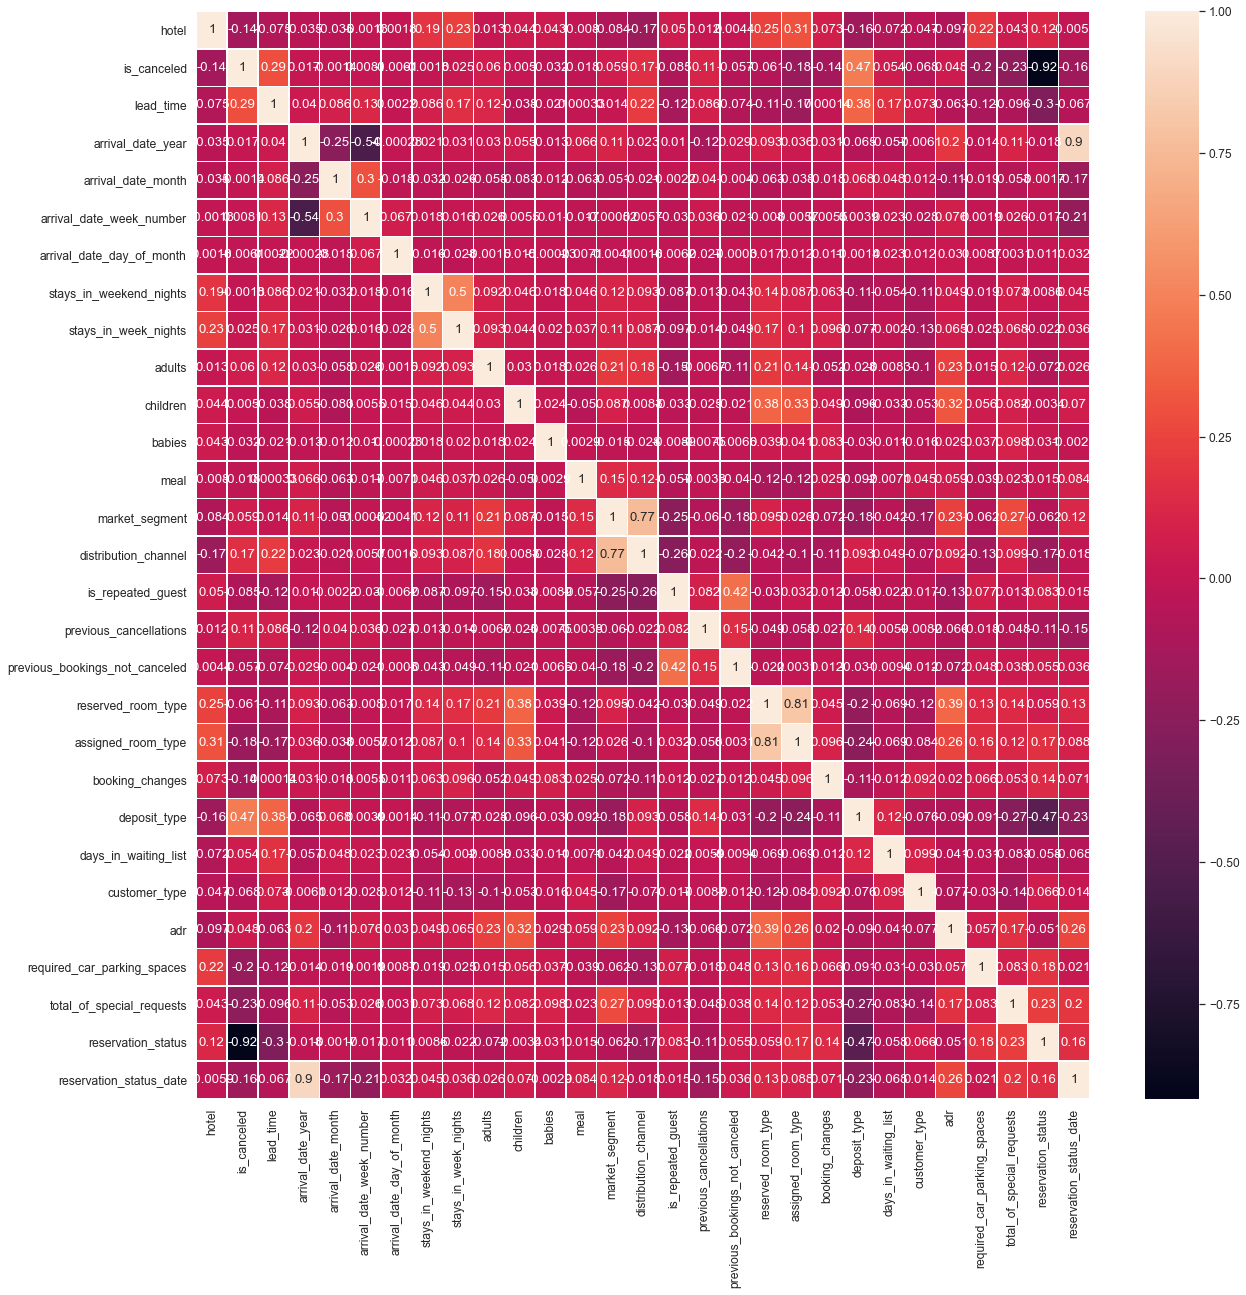

In [30]:
corr = data.corr()

plt.figure(figsize = (20, 20))
sns.set(font_scale=1.1)
sns.heatmap(corr, annot = True, linewidths = 0.5)
plt.show()

In [31]:
abs(corr['is_canceled']).sort_values(ascending = False)[1:]

reservation_status                0.917191
deposit_type                      0.468665
lead_time                         0.293177
total_of_special_requests         0.234706
required_car_parking_spaces       0.195492
assigned_room_type                0.176025
distribution_channel              0.167544
reservation_status_date           0.162077
booking_changes                   0.144371
hotel                             0.136505
previous_cancellations            0.110140
is_repeated_guest                 0.084788
customer_type                     0.068210
reserved_room_type                0.061284
adults                            0.059990
market_segment                    0.059314
previous_bookings_not_canceled    0.057355
days_in_waiting_list              0.054193
adr                               0.047622
babies                            0.032488
stays_in_week_nights              0.024771
meal                              0.017655
arrival_date_year                 0.016732
arrival_dat

In [32]:
high_corr_indices = np.where(corr['is_canceled'].abs() > 0.01)
high_corr_cols = list(data.columns[high_corr_indices])

high_corr_cols # only contains the attributes with relatively high correlation with 'is_canceled'

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'stays_in_week_nights',
 'adults',
 'babies',
 'meal',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [33]:
data.groupby('is_canceled')['reservation_status'].value_counts()

is_canceled  reservation_status
0            1.0                   75166
1            0.0                   43013
             2.0                    1207
Name: reservation_status, dtype: int64